# Garbage Classification using CNN (50% Project Completion)

This project uses a Convolutional Neural Network (CNN) to classify garbage images into categories:
- Cardboard, Glass, Metal, Paper, Plastic, Trash

Tasks completed in this notebook:
- Load and visualize dataset
- Preprocess images
- Build and train CNN model
- Visualize training results


In [8]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


In [9]:
import tensorflow as tf
print(tf.__version__)


2.19.0


## 📁 Dataset Preview
Loading sample images from the dataset and visualizing them.


Classes: ['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']


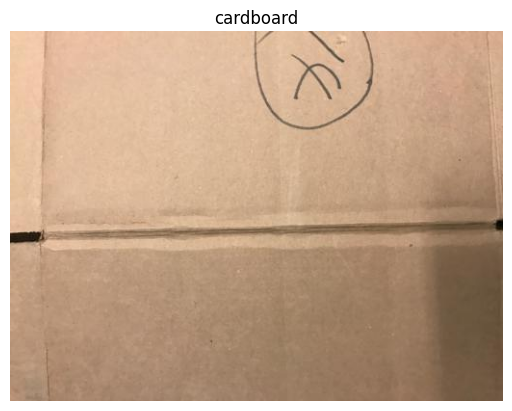

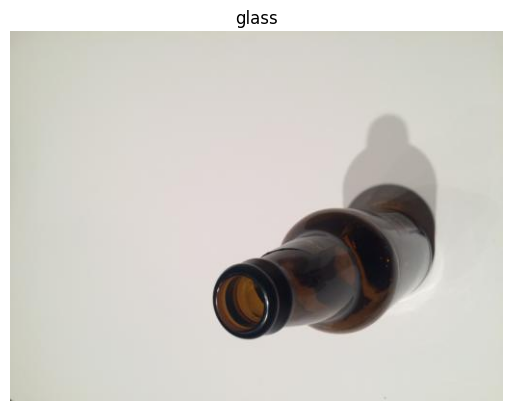

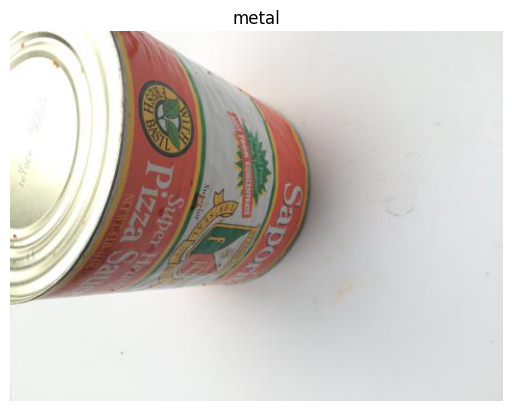

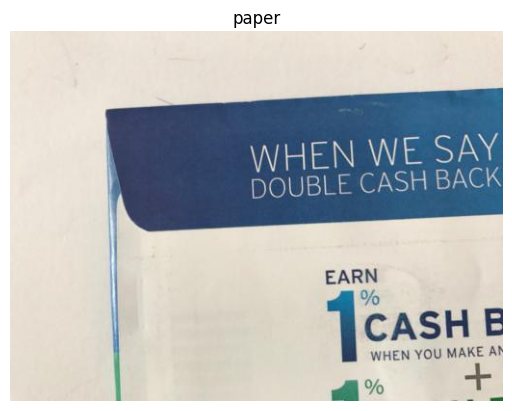

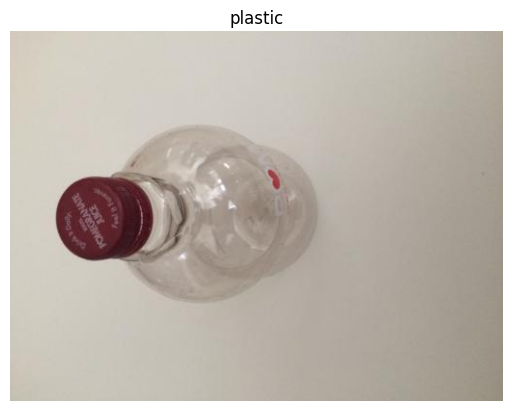

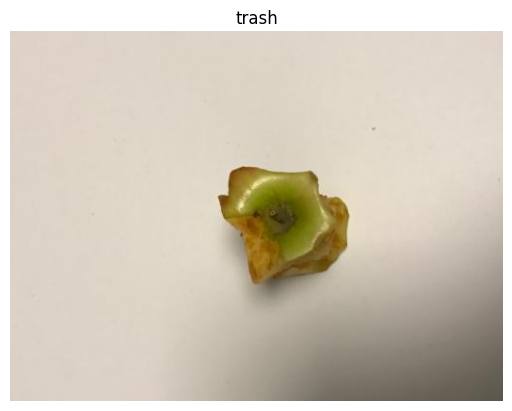

In [10]:
data_path = r'C:\Users\Tamilarasan K\garbage-classification\data\sample'  
classes = os.listdir(data_path)
print("Classes:", classes)

# Show one image per class
for cls in classes:
    image_path = os.path.join(data_path, cls, os.listdir(os.path.join(data_path, cls))[0])
    img = plt.imread(image_path)
    plt.imshow(img)
    plt.title(cls)
    plt.axis('off')
    plt.show()


## 🧼 Image Preprocessing
Using ImageDataGenerator to scale and split the dataset.


In [11]:
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_gen = datagen.flow_from_directory(
    data_path,
    target_size=(150, 150),
    batch_size=4,
    class_mode='categorical',
    subset='training'
)

val_gen = datagen.flow_from_directory(
    data_path,
    target_size=(150, 150),
    batch_size=4,
    class_mode='categorical',
    subset='validation'
)


Found 240 images belonging to 6 classes.
Found 59 images belonging to 6 classes.


## 🧠 CNN Model Architecture
Building a simple CNN with two convolutional layers.


In [12]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dense(train_gen.num_classes, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


c:\Users\Tamilarasan K\garbage-classification\.venv\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 82944)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 82944)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    10,616,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 6)              │           774 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,637,126 (40.58 MB)

 Trainable params: 10,637,126 (40.58 MB)

 Non-trainable params: 0 (0.00 B)

## 🏋️‍♂️ Model Training
Training the model for 5 epochs using our small dataset.


In [13]:
history = model.fit(
    train_gen,
    epochs=5,
    validation_data=val_gen
)


c:\Users\Tamilarasan K\garbage-classification\.venv\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
60/60 ━━━━━━━━━━━━━━━━━━━━ 9s 119ms/step - accuracy: 0.2211 - loss: 2.1612 - val_accuracy: 0.4746 - val_loss: 1.4927
Epoch 2/5
60/60 ━━━━━━━━━━━━━━━━━━━━ 7s 117ms/step - accuracy: 0.4787 - loss: 1.3705 - val_accuracy: 0.4407 - val_loss: 1.3942
Epoch 3/5
60/60 ━━━━━━━━━━━━━━━━━━━━ 7s 108ms/step - accuracy: 0.6657 - loss: 0.9879 - val_accuracy: 0.4407 - val_loss: 1.3035
Epoch 4/5
60/60 ━━━━━━━━━━━━━━━━━━━━ 7s 110ms/step - accuracy: 0.7357 - loss: 0.8055 - val_accuracy: 0.3898 - val_loss: 1.5665
Epoch 5/5
60/60 ━━━━━━━━━━━━━━━━━━━━ 7s 109ms/step - accuracy: 0.8317 - loss: 0.5427 - val_accuracy: 0.3898 - val_loss: 1.5434


## 📊 Accuracy & Loss Visualization
Visualizing model performance on training and validation sets.


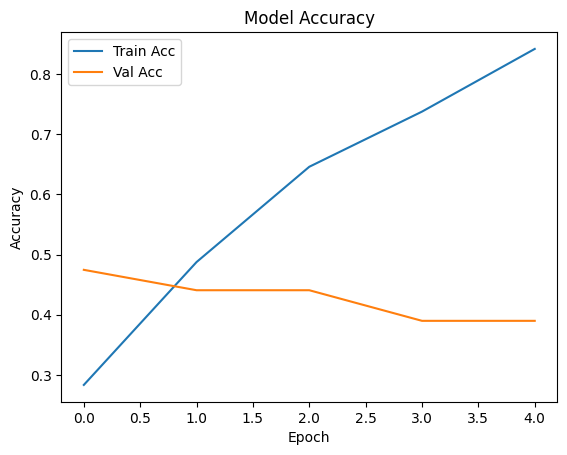

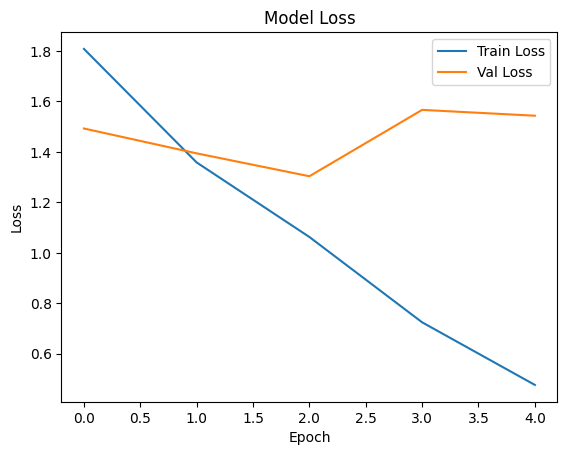

In [14]:
# Accuracy
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [15]:
model.save("garbage_classifier_model.h5")
